# Bivariate Gaussian higher poly version of original

with the same equation ofc:

![image](images\multivariate_gaussian_euqation.png)

In [61]:
%%capture
%pip install numpy
%pip install matplotlib
%pip install math

In [62]:
%%capture
import numpy as np
import matplotlib.pyplot as plt
import math

In [72]:
# choosing to centre around 0 as a default
points_in_pdf = 1000
range_in_pdf = 4

# also still in 2d atm should write a general case at some point
n = 2
covar = [[0.1, 0],
         [0, 0.1]]
inverse_covar = np.linalg.inv(covar)
det_covar = np.linalg.det(covar)

m = [0,0]
pi, e = math.pi, math.e
k = (((2*pi)**(n/2))*((det_covar)**(1/2)))**-1
print(k)

1.591549430918953


62499.93224251618


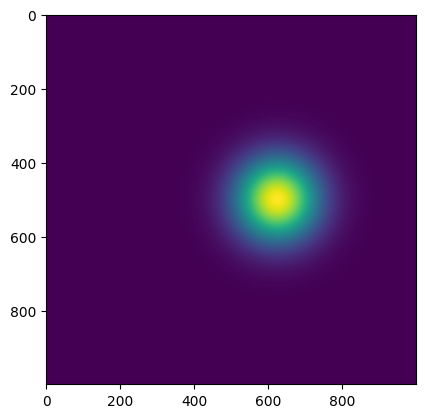

In [73]:
prob_dist = []
for i in range(points_in_pdf):
    x1 = -(range_in_pdf/2)+range_in_pdf*i/points_in_pdf
    for j in range(points_in_pdf):
        x2 = -(range_in_pdf/2)+range_in_pdf*j/points_in_pdf
        x = [x1,x2]

        x_minus_M = np.subtract(x,M)
        # the left matrix multiplication in the exponenet
        temp1 = np.linalg.matmul(x_minus_M.transpose(),inverse_covar)
        # the right matrix multiplication in the exponent (temp2 is a scalar so i assume my vectors are the correct shape)
        temp2 = np.linalg.matmul(temp1,x_minus_M)
        prob_dist += [(k*(e**(-0.5*temp2)))]

prob_dist = np.array(prob_dist)
plt.imshow(prob_dist.reshape(points_in_pdf,points_in_pdf))

#this is a checksum if most of ur pdf lies within ur range about 0,0 then this should be close to one       
print(sum(prob_dist))

cool that only took 10 mins from the previous version, but the math checksum is implything that i am wrong since it sumes to 55000 not 1 ...